In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Files/iphone_purchase_records.csv')
df

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [3]:
df.isnull().sum()

Gender             0
Age                0
Salary             0
Purchase Iphone    0
dtype: int64

In [4]:
df.duplicated().sum()

20

In [5]:
df.drop_duplicates()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [6]:
df['Purchase Iphone'].value_counts(normalize=True)*100

Purchase Iphone
0    64.25
1    35.75
Name: proportion, dtype: float64

In [7]:
df.groupby('Gender')['Purchase Iphone'].value_counts()

Gender  Purchase Iphone
Female  0                  127
        1                   77
Male    0                  130
        1                   66
Name: count, dtype: int64

<Axes: xlabel='Age', ylabel='Salary'>

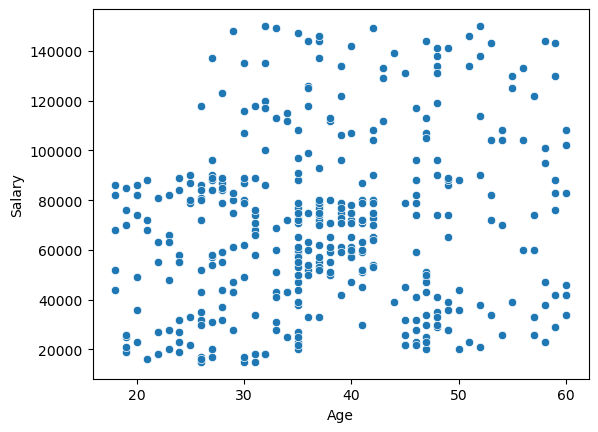

In [8]:
sns.scatterplot(x = 'Age', y = 'Salary', data = df)

<Axes: xlabel='Purchase Iphone', ylabel='Salary'>

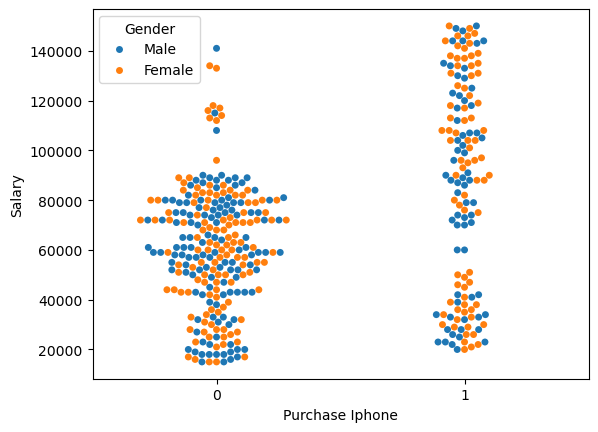

In [9]:
sns.swarmplot(x = 'Purchase Iphone', y = 'Salary', hue = 'Gender', data = df)

In [10]:
df['Gender'] = pd.get_dummies(df['Gender'], drop_first=True)
df

,Gender,Age,Salary,Purchase Iphone
0,True,19,19000,0
1,True,35,20000,0
2,False,26,43000,0
3,False,27,57000,0
4,True,19,76000,0
...,...,...,...,...
395,False,46,41000,1
396,True,51,23000,1
397,False,50,20000,1
398,True,36,33000,0


In [11]:
y = df['Purchase Iphone']
x = df.drop('Purchase Iphone', axis=1)

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=43)

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [14]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [15]:
y_pred = model.predict(x_test)

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [17]:
accuracy_score(y_test, y_pred)*100

77.5

In [18]:
print(confusion_matrix(y_test, y_pred))

[[43  7]
 [11 19]]


In [19]:
clss = classification_report(y_test, y_pred)
print(clss)

              precision    recall  f1-score   support

           0       0.80      0.86      0.83        50
           1       0.73      0.63      0.68        30

    accuracy                           0.78        80
   macro avg       0.76      0.75      0.75        80
weighted avg       0.77      0.78      0.77        80



In [20]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [21]:
y_predd = dtc.predict(x_test)

accuracy_score(y_test, y_predd)*100

85.0

In [22]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc.fit(x_train, y_train)

RandomForestClassifier()

In [23]:
y_predr = rfc.predict(x_test)

accuracy_score(y_test, y_predr)*100

83.75

In [24]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(x_train, y_train)

KNeighborsClassifier()

In [25]:
y_predk = knn.predict(x_test)

accuracy_score(y_test, y_predk)*100

85.0

In [26]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(x_train, y_train)

SVC()

In [27]:
y_preds = svc.predict(x_test)

accuracy_score(y_test, y_preds)*100

85.0